In [0]:
# Copyright 2018 Google LLC.

# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at

# https://www.apache.org/licenses/LICENSE-2.0

# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
# Leave until pip installed version of t2t support gym_pong_trajectories_from_policy.
import sys
sys.path.append("/home/blazej.osinski/t2t/tensor2tensor")

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import collections

from tensor2tensor import models
from tensor2tensor import problems
from tensor2tensor.layers import common_layers
from tensor2tensor.utils import trainer_lib
from tensor2tensor.utils import t2t_model
from tensor2tensor.utils import registry
from tensor2tensor.utils import metrics

# Other setup
Modes = tf.estimator.ModeKeys

prefix = "~/t2t_test_large"
# Setup some directories
data_dir = os.path.expanduser(prefix + "/data")
tmp_dir = os.path.expanduser(prefix + "/tmp")
train_dir = os.path.expanduser(prefix + "/train")
checkpoint_dir = os.path.expanduser(prefix + "/checkpoints")
tf.gfile.MakeDirs(data_dir)
tf.gfile.MakeDirs(tmp_dir)
tf.gfile.MakeDirs(train_dir)
tf.gfile.MakeDirs(checkpoint_dir)

# RL


In [4]:
sys.argv = [sys.argv[0], "--model_path", "/home/blazej.osinski/t2t/joblogs/pong20180302_112813/model690.ckpt"]

In [5]:
# flags = tf.flags
# FLAGS = flags.FLAGS

In [7]:
# This operation takes some time - around 15 minutes.
gym_problem = problems.problem("gym_pong_trajectories_from_policy")
gym_problem.generate_data(data_dir, tmp_dir)

[2018-03-02 14:20:41,034] Making new env: PongNoFrameskip-v4
[2018-03-02 14:20:41,283] Making new env: PongNoFrameskip-v4


Instructions for updating:
Use the `axis` argument instead


[2018-03-02 14:20:41,779] From /home/blazej.osinski/t2t/t2t_jupyter_kernel/local/lib/python2.7/site-packages/tensorflow/python/ops/distributions/categorical.py:310: calling argmax (from tensorflow.python.ops.math_ops) with dimension is deprecated and will be removed in a future version.
Instructions for updating:
Use the `axis` argument instead


/home/blazej.osinski/t2t/joblogs/pong20180302_112813/model690.ckpt
INFO:tensorflow:Restoring parameters from /home/blazej.osinski/t2t/joblogs/pong20180302_112813/model690.ckpt


[2018-03-02 14:20:41,830] Restoring parameters from /home/blazej.osinski/t2t/joblogs/pong20180302_112813/model690.ckpt


INFO:tensorflow:Generated 4998 Examples


[2018-03-02 14:35:16,661] Generated 4998 Examples


INFO:tensorflow:Reading data files from /home/blazej.osinski/t2t_test_large/data/gym_pong_trajectories_from_policy-train*


[2018-03-02 14:52:01,069] Reading data files from /home/blazej.osinski/t2t_test_large/data/gym_pong_trajectories_from_policy-train*


INFO:tensorflow:partition: 0 num_data_files: 10


[2018-03-02 14:52:01,074] partition: 0 num_data_files: 10


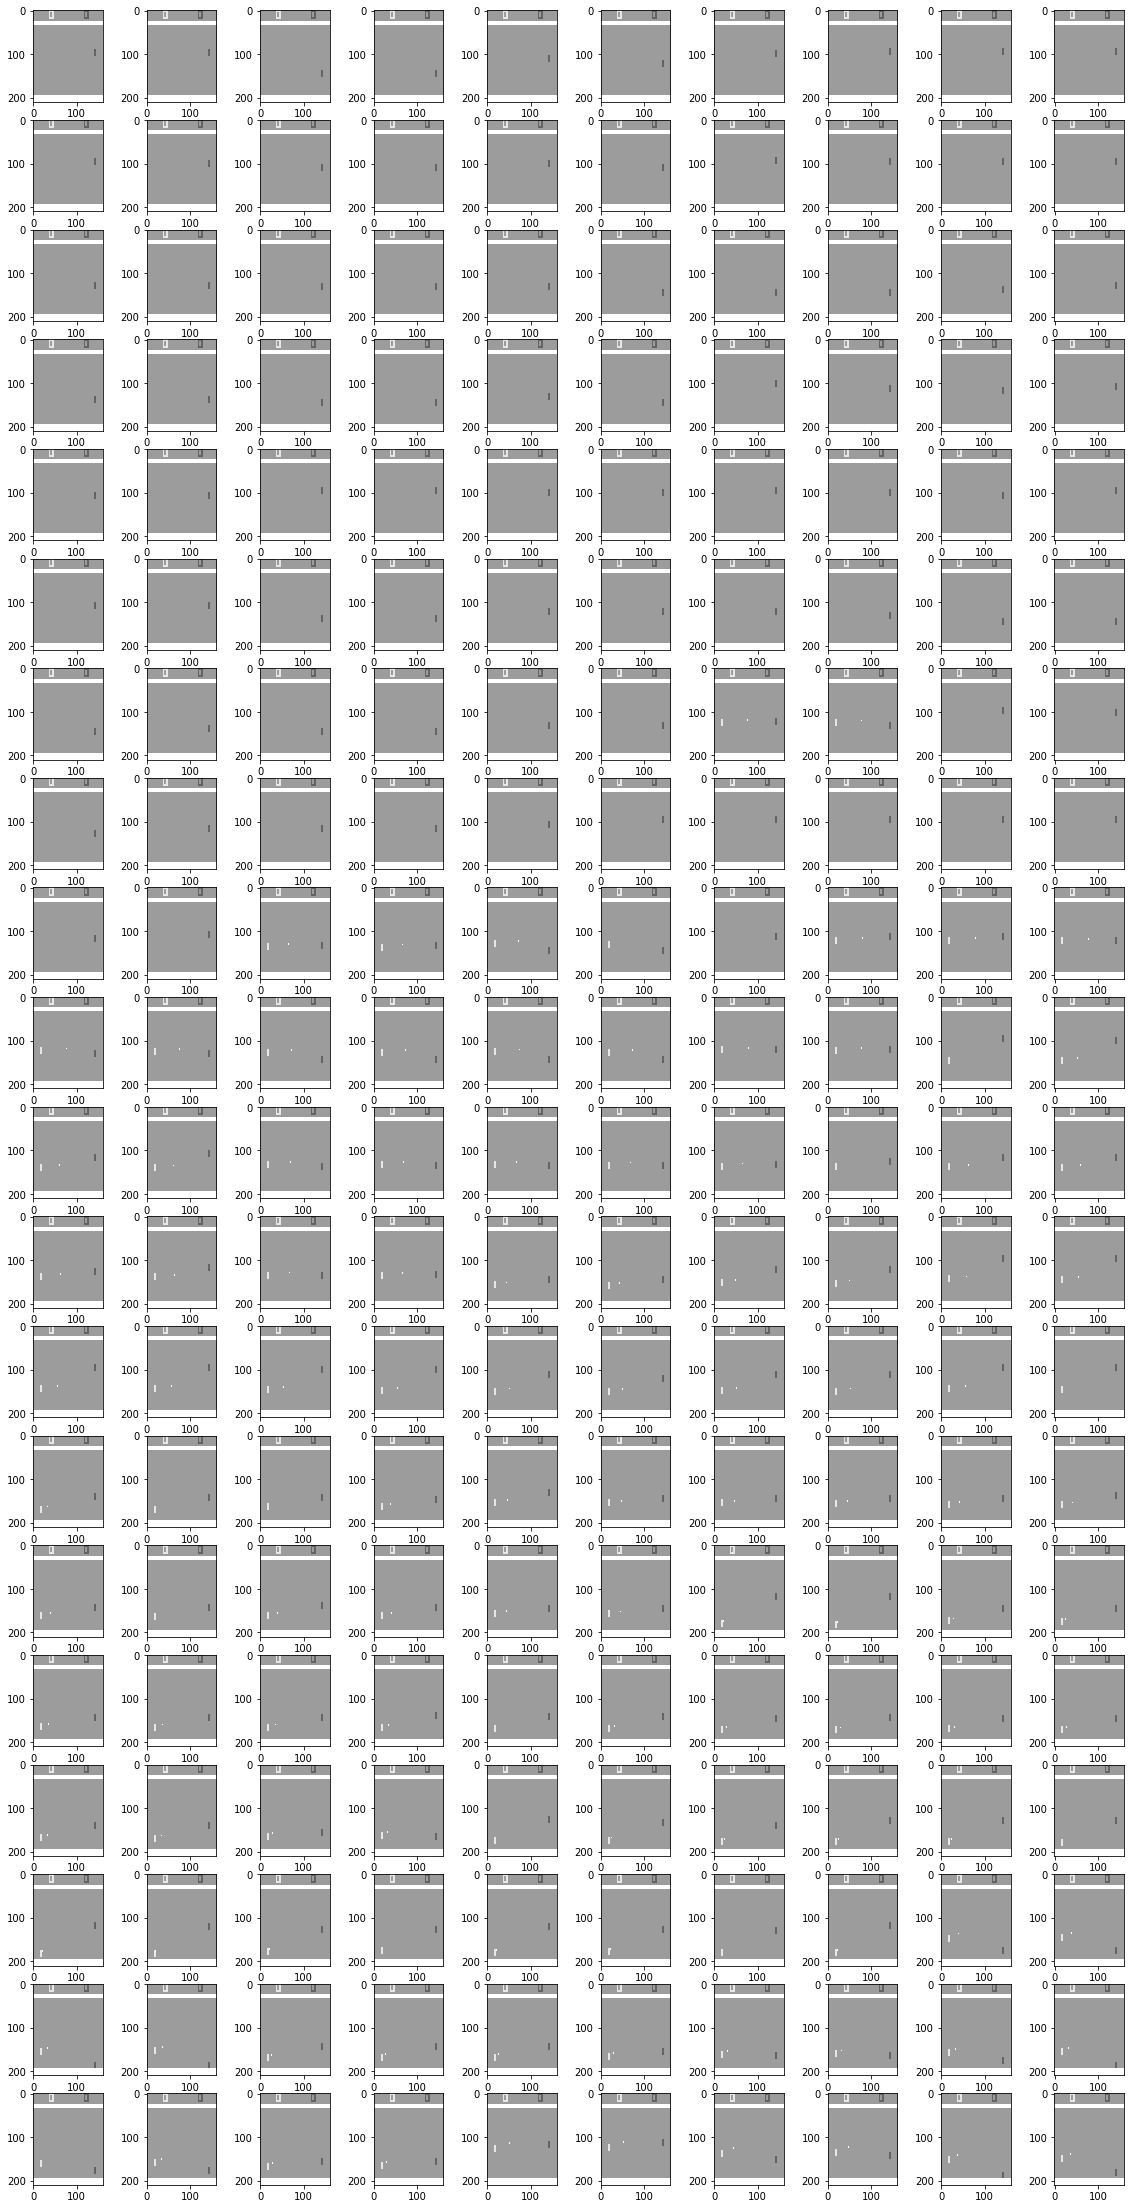

In [10]:
dataset = gym_problem.dataset(Modes.TRAIN, data_dir)
iterator = dataset.make_one_shot_iterator()
next_element = iterator.get_next()


fig=plt.figure(figsize=(20, 40))
columns = 10
rows = 20

with tf.Session() as sess:
    for inx in range(100):
        value = sess.run(next_element)
        fig.add_subplot(rows, columns, 2*inx+1)        
        image = value["inputs"].reshape([210,160,3])
        plt.imshow(image[:, :, 0].astype(np.float32), cmap=plt.get_cmap('gray'))        
        fig.add_subplot(rows, columns, 2*inx+2)
        image = value["targets"].reshape([210,160,3])
        plt.imshow(image[:, :, 0].astype(np.float32), cmap=plt.get_cmap('gray'))        
plt.show()